# Heart Disease Prediction

In [24]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [25]:
df = pd .read_csv('framingham.csv')

In [26]:
df.head()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
0,1,39,4.0,0,0.0,0.0,0,0,0,195.0,106.0,70.0,26.97,80.0,77.0,0
1,0,46,2.0,0,0.0,0.0,0,0,0,250.0,121.0,81.0,28.73,95.0,76.0,0
2,1,48,1.0,1,20.0,0.0,0,0,0,245.0,127.5,80.0,25.34,75.0,70.0,0
3,0,61,3.0,1,30.0,0.0,0,1,0,225.0,150.0,95.0,28.58,65.0,103.0,1
4,0,46,3.0,1,23.0,0.0,0,0,0,285.0,130.0,84.0,23.10,85.0,85.0,0


In [27]:
df.tail()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
4233,1,50,1.0,1,1.0,0.0,0,1,0,313.0,179.0,92.0,25.97,66.0,86.0,1
4234,1,51,3.0,1,43.0,0.0,0,0,0,207.0,126.5,80.0,19.71,65.0,68.0,0
4235,0,48,2.0,1,20.0,NaN,0,0,0,248.0,131.0,72.0,22.00,84.0,86.0,0
4236,0,44,1.0,1,15.0,0.0,0,0,0,210.0,126.5,87.0,19.16,86.0,NaN,0
4237,0,52,2.0,0,0.0,0.0,0,0,0,269.0,133.5,83.0,21.47,80.0,107.0,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4238 entries, 0 to 4237
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   male             4238 non-null   int64  
 1   age              4238 non-null   int64  
 2   education        4133 non-null   float64
 3   currentSmoker    4238 non-null   int64  
 4   cigsPerDay       4209 non-null   float64
 5   BPMeds           4185 non-null   float64
 6   prevalentStroke  4238 non-null   int64  
 7   prevalentHyp     4238 non-null   int64  
 8   diabetes         4238 non-null   int64  
 9   totChol          4188 non-null   float64
 10  sysBP            4238 non-null   float64
 11  diaBP            4238 non-null   float64
 12  BMI              4219 non-null   float64
 13  heartRate        4237 non-null   float64
 14  glucose          3850 non-null   float64
 15  TenYearCHD       4238 non-null   int64  
dtypes: float64(9), int64(7)
memory usage: 529.9 KB


<AxesSubplot:>

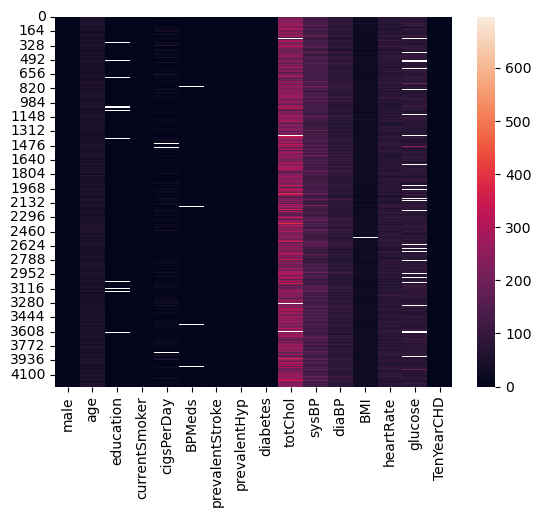

In [29]:
sns.heatmap(df)

In [30]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

<AxesSubplot:>

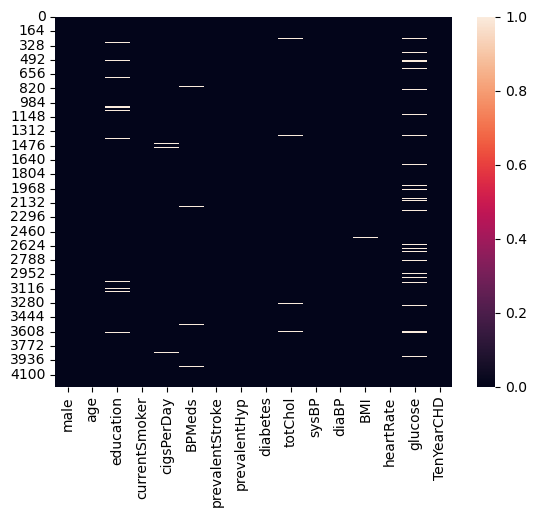

In [31]:
sns.heatmap(df.isnull())

In [32]:
df.corr()

,male,age,education,currentSmoker,cigsPerDay,BPMeds,prevalentStroke,prevalentHyp,diabetes,totChol,sysBP,diaBP,BMI,heartRate,glucose,TenYearCHD
male,1.000000,-0.028979,0.017352,0.197596,0.317930,-0.052506,-0.004546,0.005313,0.015708,-0.070322,-0.035989,0.057933,0.081672,-0.116620,0.006083,0.088428
age,-0.028979,1.000000,-0.165883,-0.213748,-0.192791,0.122995,0.057655,0.307194,0.101258,0.262131,0.394302,0.206104,0.135800,-0.012823,0.122256,0.225256
education,0.017352,-0.165883,1.000000,0.018532,0.008085,-0.010815,-0.035112,-0.081970,-0.038680,-0.023115,-0.129631,-0.062316,-0.137504,-0.054206,-0.035721,-0.054059
currentSmoker,0.197596,-0.213748,0.018532,1.000000,0.769690,-0.048938,-0.032988,-0.103260,-0.044295,-0.046562,-0.130230,-0.107746,-0.167650,0.062356,-0.056826,0.019456
cigsPerDay,0.317930,-0.192791,0.008085,0.769690,1.000000,-0.046134,-0.032707,-0.066146,-0.037067,-0.026320,-0.088780,-0.056632,-0.092856,0.075157,-0.058960,0.057884
BPMeds,-0.052506,0.122995,-0.010815,-0.048938,-0.046134,1.000000,0.117365,0.261187,0.052047,0.080558,0.254219,0.194227,0.100668,0.015233,0.051176,0.087489
prevalentStroke,-0.004546,0.057655,-0.035112,-0.032988,-0.032707,0.117365,1.000000,0.074830,0.006949,0.000067,0.057009,0.045190,0.025891,-0.017676,0.018431,0.061810
prevalentHyp,0.005313,0.307194,-0.081970,-0.103260,-0.066146,0.261187,0.074830,1.000000,0.077808,0.163993,0.696755,0.615751,0.301318,0.147261,0.086834,0.177603
diabetes,0.015708,0.101258,-0.038680,-0.044295,-0.037067,0.052047,0.006949,0.077808,1.000000,0.040278,0.111283,0.050329,0.087036,0.048994,0.617627,0.097317
totChol,-0.070322,0.262131,-0.023115,-0.046562,-0.026320,0.080558,0.000067,0.163993,0.040278,1.000000,0.208908,0.165182,0.115767,0.091125,0.046408,0.082184


<AxesSubplot:>

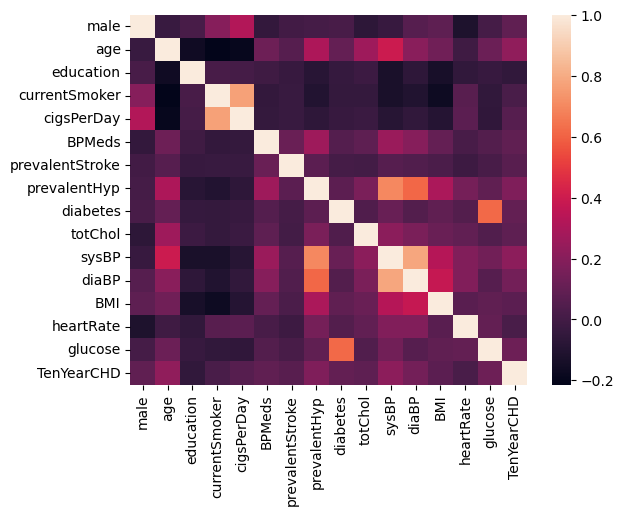

In [33]:
sns.heatmap(df.corr())

<AxesSubplot:xlabel='male'>

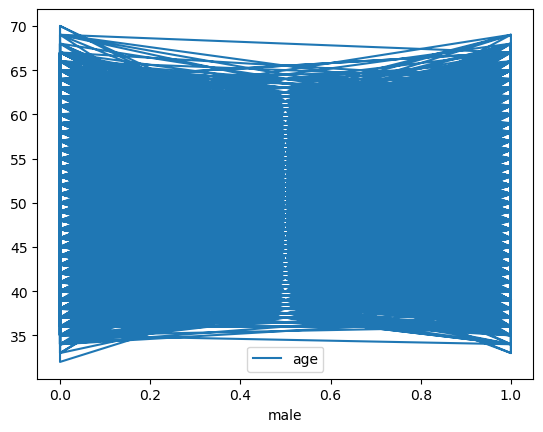

In [34]:
df.plot('male','age')

<AxesSubplot:xlabel='male'>

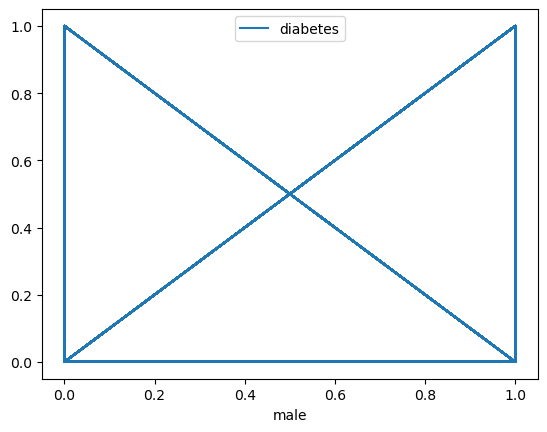

In [35]:
df.plot('male','diabetes')

([<matplotlib.patches.Wedge at 0x1fa5862b3a0>,
 [Text(-0.2392589523180142, 1.0736643580447691, 'female'),
  Text(0.2392588517943011, -1.0736643804458044, 'male')],
 [Text(-0.13050488308255317, 0.5856351043880559, '56.98%'),
  Text(0.13050482825143694, -0.5856351166068022, '43.02%')])

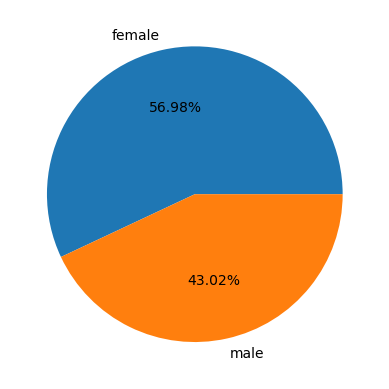

In [36]:
x = df[df['male']==0].count().sum()
y = df[df['male']==1].count().sum()
p= [x,y]
mylabels = ['female','male']
plt.pie(p,labels=mylabels,autopct='%0.2f%%')

([<matplotlib.patches.Wedge at 0x1fa58671880>,
 [Text(-0.2392589523180142, 1.0736643580447691, 'NO Cuurent Smoker'),
  Text(0.2392588517943011, -1.0736643804458044, 'Current Smoker')],
 [Text(-0.13050488308255317, 0.5856351043880559, '56.98%'),
  Text(0.13050482825143694, -0.5856351166068022, '43.02%')])

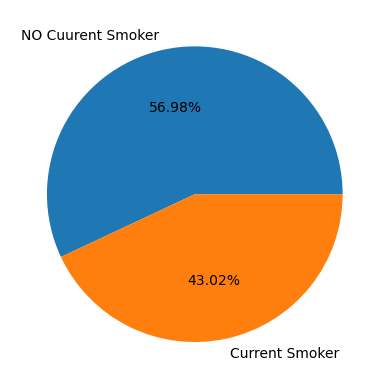

In [37]:
a = df[df['currentSmoker']==0].count().sum()
b = df[df['currentSmoker']==1].count().sum()
v = [x,y]
mylabels = ['NO Cuurent Smoker','Current Smoker']
plt.pie(v,labels=mylabels,autopct='%0.2f%%')

<AxesSubplot:xlabel='age'>

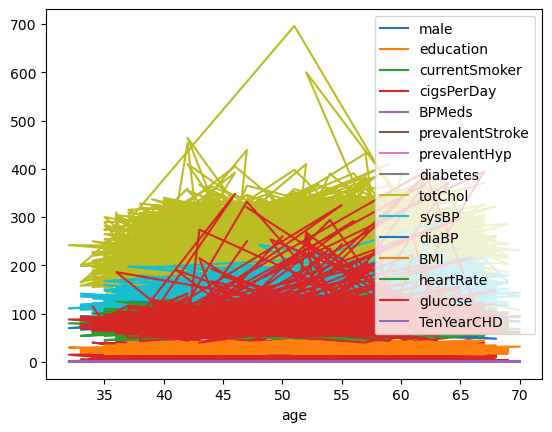

In [38]:
df.plot('age')

In [39]:
df.isnull().sum()

male                 0
age                  0
education          105
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [40]:
df.education

0       4.0
1       2.0
2       1.0
3       3.0
4       3.0
       ... 
4233    1.0
4234    3.0
4235    2.0
4236    1.0
4237    2.0
Name: education, Length: 4238, dtype: float64

In [41]:
df['education'].mean()

1.9789499153157513

In [42]:
df['education'].median()

2.0

In [43]:
median = df['education'].median()
df['education'].fillna(value=median, inplace = True)

In [44]:
df['education'].isnull().sum()

0

In [45]:
df.isnull().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay          29
BPMeds              53
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol             50
sysBP                0
diaBP                0
BMI                 19
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [46]:
df['cigsPerDay'].isnull().sum()

29

In [47]:
df['cigsPerDay'].mean()

9.003088619624615

In [48]:
df['cigsPerDay'].median()

0.0

In [49]:
mean = df['cigsPerDay'].mean()
df['cigsPerDay'].fillna(value = mean, inplace = True)

In [50]:
df['cigsPerDay'].isnull().sum()

0

In [51]:
df['BPMeds'].mean()

0.02962962962962963

In [52]:
df['BPMeds'].median()

0.0

In [53]:
BPMeds_fillna = df['BPMeds'].mean()
df['BPMeds'].fillna(value=BPMeds_fillna,inplace = True)

In [54]:
df['totChol'].mean()

236.72158548233045

In [55]:
df['totChol'].median()

234.0

In [56]:
totChol_fillna = df['totChol'].median()
df['totChol'].fillna(value=totChol_fillna,inplace = True)

In [57]:
df['BMI'].mean()

25.80200758473571

In [58]:
df['BMI'].median()

25.4

In [59]:
BMI_fillna = df['BMI'].mean()
df['BMI'].fillna(value=BMI_fillna,inplace=True)

In [60]:
df.isnull().sum()

male                 0
age                  0
education            0
currentSmoker        0
cigsPerDay           0
BPMeds               0
prevalentStroke      0
prevalentHyp         0
diabetes             0
totChol              0
sysBP                0
diaBP                0
BMI                  0
heartRate            1
glucose            388
TenYearCHD           0
dtype: int64

In [61]:
df['heartRate'].mean()

75.87892376681614

In [62]:
df['heartRate'].median()

75.0

In [63]:
h = df['heartRate'].median()
df['heartRate'].fillna(value = h, inplace = True)

In [64]:
df['glucose'].mean()

81.96675324675324

In [65]:
df['glucose'].median()

78.0

In [66]:
glu = df['glucose'].median()
df['glucose'].fillna(value = glu, inplace = True)

In [67]:
df.isnull().sum()

male               0
age                0
education          0
currentSmoker      0
cigsPerDay         0
BPMeds             0
prevalentStroke    0
prevalentHyp       0
diabetes           0
totChol            0
sysBP              0
diaBP              0
BMI                0
heartRate          0
glucose            0
TenYearCHD         0
dtype: int64

In [68]:
from sklearn.model_selection import train_test_split

In [69]:
df.shape

(4238, 16)

In [70]:
df.columns

Index(['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose', 'TenYearCHD'],
      dtype='object')

In [71]:
X = df[['male', 'age', 'education', 'currentSmoker', 'cigsPerDay', 'BPMeds',
       'prevalentStroke', 'prevalentHyp', 'diabetes', 'totChol', 'sysBP',
       'diaBP', 'BMI', 'heartRate', 'glucose']]

In [72]:
y = df['TenYearCHD']

In [73]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 141)

# LogisticRegression model

In [74]:
from sklearn.linear_model import LogisticRegression

In [86]:
lr = LogisticRegression()

In [88]:
lr.fit(X_train,y_train)

C:\Users\mdp12\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [77]:
pred = lr.predict(X_test)

In [78]:
pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [79]:
from sklearn.metrics import classification_report

In [80]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       0.85      0.99      0.91      1074
           1       0.47      0.04      0.07       198

    accuracy                           0.84      1272
   macro avg       0.66      0.52      0.49      1272
weighted avg       0.79      0.84      0.78      1272



In [81]:
from sklearn.metrics import confusion_matrix

In [82]:
confusion_matrix(y_test,pred)

array([[1065,    9],
       [ 190,    8]], dtype=int64)